## Imports

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

## Code

In [210]:
# tendencia - para onde meu dado vai conforme o tempo passa (evolucao temporal) - direcao
# sazonalidade - entender como funcionam as oscilacoes da serie temporal - recorrencia das oscilacoes
# residuo - o que sobra do sinal - que não traz informação revelante

In [211]:
df_path = "https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv"

In [212]:
df = pd.read_csv(df_path)

df.head()

DATE    Value
0  01-01-1985  72.5052
1  02-01-1985  70.6720
2  03-01-1985  62.4502
3  04-01-1985  57.4714
4  05-01-1985  55.3151

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [214]:
df.index = pd.to_datetime(df.DATE,format = "%m-%d-%Y")

In [215]:
df.drop("DATE", inplace=True, axis=1)

In [216]:
df.head()

Value
DATE               
1985-01-01  72.5052
1985-02-01  70.6720
1985-03-01  62.4502
1985-04-01  57.4714
1985-05-01  55.3151

In [217]:
df.loc['1985-05-01']

Value    55.3151
Name: 1985-05-01 00:00:00, dtype: float64

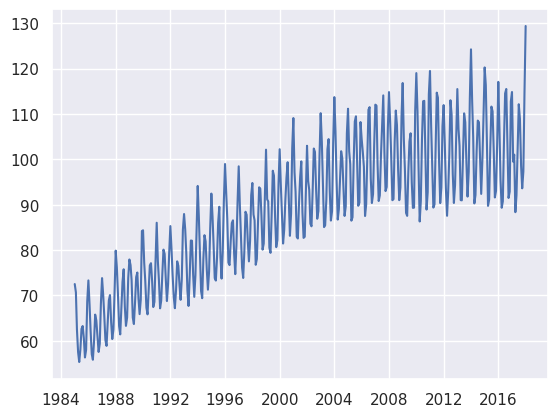

In [218]:
plt.plot(df.index, df.Value)
plt.show()

In [219]:
results = seasonal_decompose(df)

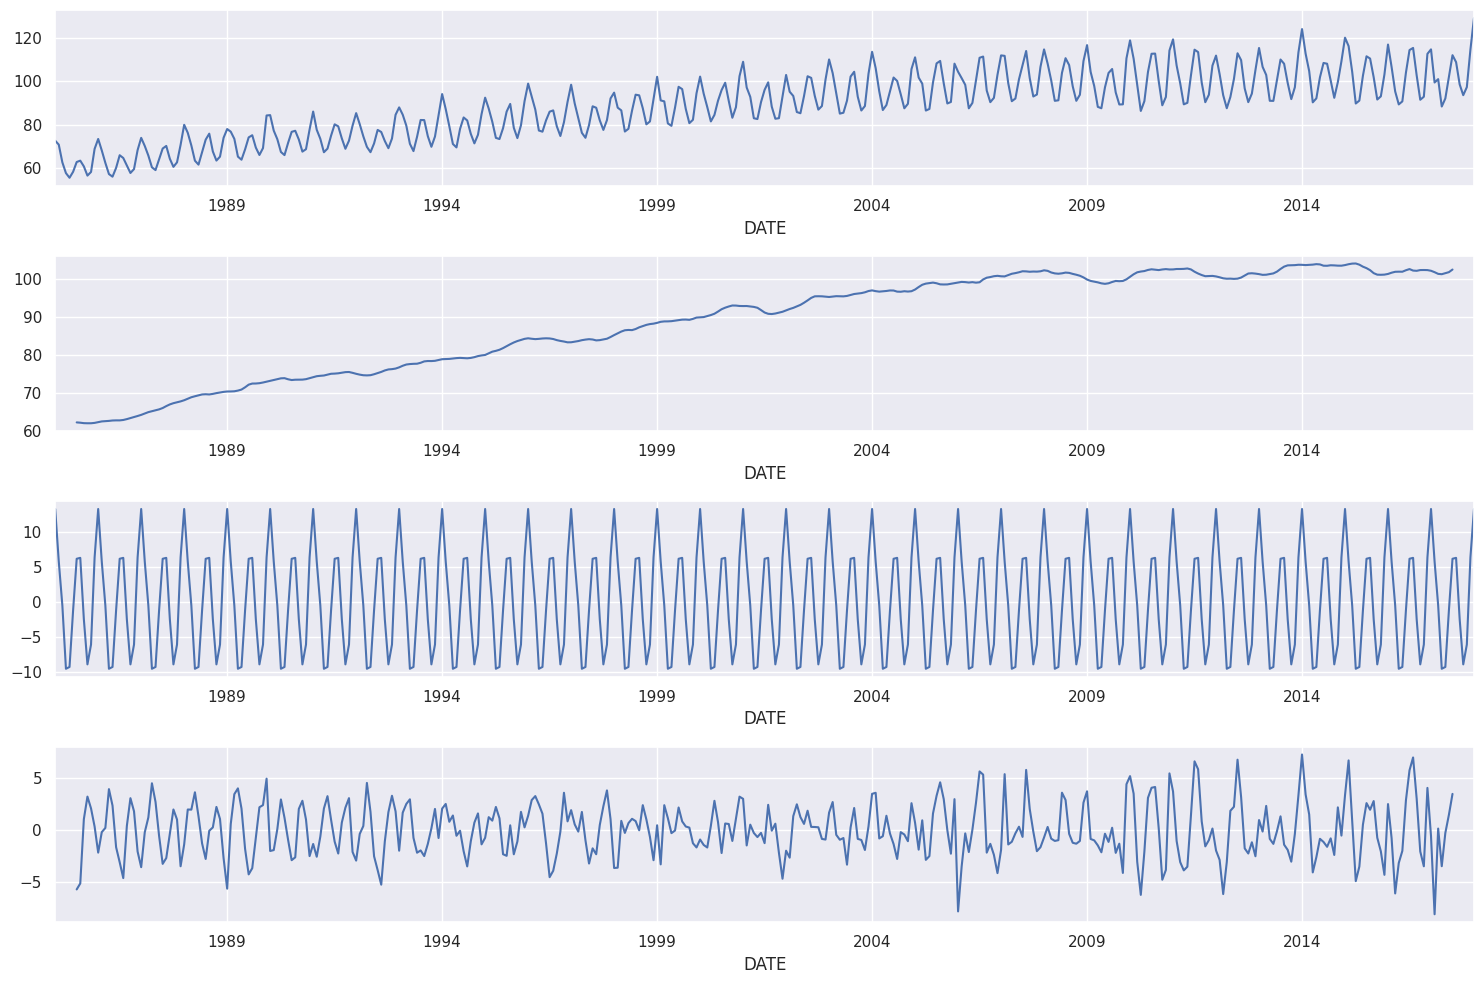

In [220]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15,10))

results.observed.plot(ax=ax1)
results.trend.plot(ax=ax2)
results.seasonal.plot(ax=ax3)
results.resid.plot(ax=ax4)

plt.tight_layout()

**ADF (Augmented Dickey-Fuller)**

    H0 -> Hipótese Nula (não é estacionária)
    H1 -> Hipótese Alternativa (rejeição da hipótese nula: é estacionária)

- p value < 0.05 (5%), então rejeitamos H0 com um nível de confiança de 95%

In [221]:
# Estacionaria ou não estacionaria - estacionaria: média, variancia e co-variancia são constantes
from statsmodels.tsa.stattools import adfuller

In [222]:
X = df.Value.values
result = adfuller(X)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print(f"Valores críticos: ")

for key, value in result[4].items():
    print(f"\t{key}: {value}")
    
print("\n")
p_value = result[1]
if p_value < 0.05:
    print("Rejeitamos a H0 (hipótese nula).")
    print("A série é estacionária!")
else:
    print("H0: Hipótese nula.")
    print("A série não é estacionária!")

Teste ADF
Teste Estatístico: -2.256990350047241
P-Value: 0.18621469116586903
Valores críticos: 
	1%: -3.4476305904172904
	5%: -2.869155980820355
	10%: -2.570827146203181


H0: Hipótese nula.
A série não é estacionária!


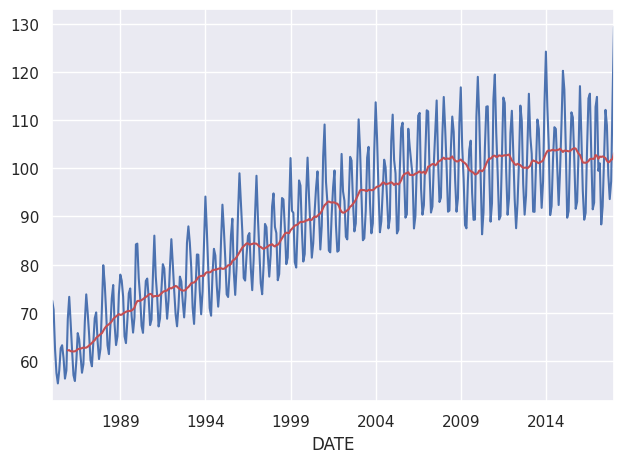

In [223]:
ma = df.rolling(12).mean()


f, ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()


In [224]:
ma[:15]

Value
DATE                 
1985-01-01        NaN
1985-02-01        NaN
1985-03-01        NaN
1985-04-01        NaN
1985-05-01        NaN
1985-06-01        NaN
1985-07-01        NaN
1985-08-01        NaN
1985-09-01        NaN
1985-10-01        NaN
1985-11-01        NaN
1985-12-01  62.165667
1986-01-01  62.232375
1986-02-01  62.008617
1986-03-01  61.989608

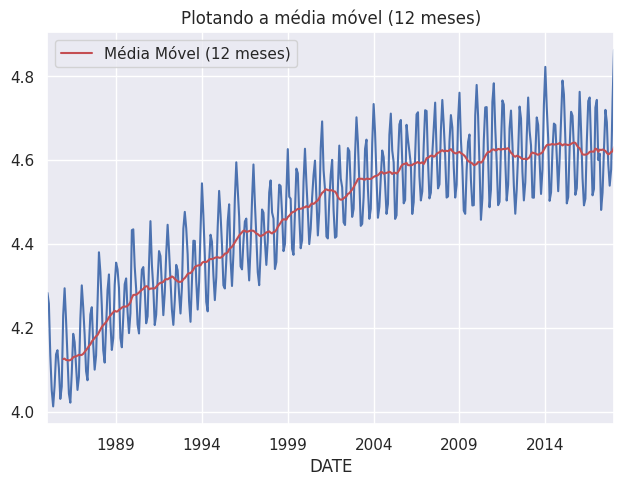

In [225]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

ma_log_refat = ma_log.rename(columns={'Value':'Média Móvel (12 meses)'})

f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log_refat.plot(ax=ax, legend=True, color='r')

plt.tight_layout()
plt.title("Plotando a média móvel (12 meses)")
plt.show()

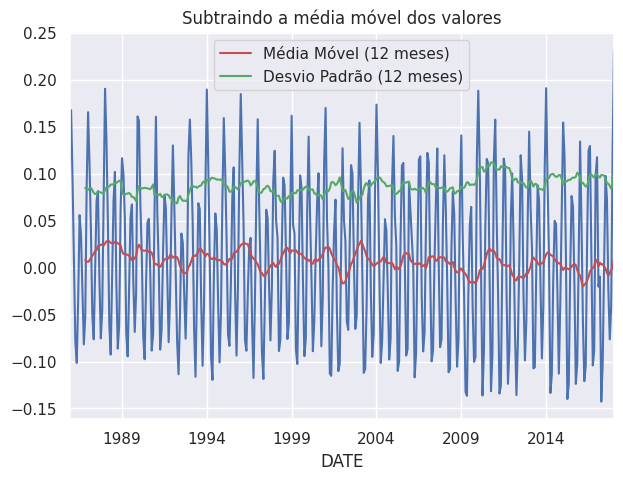

In [226]:
df_sub = (df_log - ma_log).dropna()

ma_sub = df_sub.rolling(12).mean()
std = df_sub.rolling(12).std()

ma_sub.rename(columns={'Value':'Média Móvel (12 meses)'}, inplace=True)
std.rename(columns={'Value':'Desvio Padrão (12 meses)'}, inplace=True)

f, ax = plt.subplots()
df_sub.plot(ax=ax, legend=False)
ma_sub.plot(ax=ax, legend=True, color='r')
std.plot(ax=ax, legend=True, color='g')

plt.tight_layout()
plt.title("Subtraindo a média móvel dos valores")
plt.show()

In [227]:
X_s = df_sub.Value.values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print(f"Valores críticos: ")

for key, value in result_s[4].items():
    print(f"\t{key}: {value}")
    

print("\n")
p_value = result_s[1]
if p_value < 0.05:
    print("Rejeitamos a H0 (hipótese nula).")
    print("A série é estacionária!")
else:
    print("H0: Hipótese nula.")
    print("A série não é estacionária!")

Teste ADF
Teste Estatístico: -5.211586185365429
P-Value: 8.325639759946488e-06
Valores críticos: 
	1%: -3.448147967010838
	5%: -2.8693833397824413
	10%: -2.5709483564645725


Rejeitamos a H0 (hipótese nula).
A série é estacionária!


In [228]:
df_diff  = df_sub.diff(1) # primeira derivada
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

ma_diff.rename(columns={'Value':'Média Móvel (12 meses)'}, inplace=True)
std_diff.rename(columns={'Value':'Desvio Padrão (12 meses)'}, inplace=True)

f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=True, color='r')
std_diff.plot(ax=ax, legend=True, color='g')

plt.tight_layout()
plt.title("Realizando 1° Derivação")
plt.show()

In [229]:
X_diff = df_diff.Value.dropna().values
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print(f"Valores críticos: ")

for key, value in result_diff[4].items():
    print(f"\t{key}: {value}")
    

print("\n")
p_value = result_diff[1]
if p_value < 0.05:
    print("Rejeitamos a H0 (hipótese nula).")
    print("A série é estacionária!")
else:
    print("H0: Hipótese nula.")
    print("A série não é estacionária!")

Teste ADF
Teste Estatístico: -7.651129568145197
P-Value: 1.78812673543548e-11
Valores críticos: 
	1%: -3.448294490928673
	5%: -2.869447722240253
	10%: -2.570982681065269


Rejeitamos a H0 (hipótese nula).
A série é estacionária!


ARIMA - AR: Autoregressivo, I: Integrado, MA: Moving Average

A (x,y,z) -> ACF, PACF

In [230]:
lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags=25)

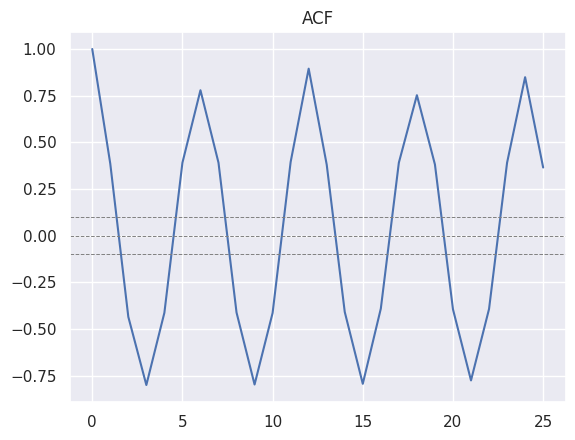

In [231]:
# 5% ACF

# 1.96/sqrt(N-d) -> N - numero de pontos do df e d eh o numero de vezes que nós diferenciamos o dataframe
sns.set_theme()
plt.plot(lag_acf)

plt.axhline(y= (-1.96/(np.sqrt(len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y= 0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y= (+1.96/(np.sqrt(len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)

plt.title("ACF")
plt.show()

plt.plot(lag_pacf)

plt.axhline(y= (-1.96/(np.sqrt(len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y= 0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y= (+1.96/(np.sqrt(len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)

plt.title("PACF")
plt.show()

In [232]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [233]:
plot_acf(df.Value)
plot_pacf(df.Value)
plt.show()

In [234]:
new_df = pd.read_csv('bases/train.csv', index_col='id', parse_dates=['date'])
# you can find the base above at: https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data?select=train.csv

In [235]:
new_df['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

In [236]:
df_1 = new_df.loc[new_df['store_nbr'] == 1, ['date','family','sales']]
df_1 = df_1.rename(columns={'date':'ds','sales':'y','family':'unique_id'})
df_1

ds                   unique_id            y
id                                                         
0       2013-01-01                  AUTOMOTIVE     0.000000
1       2013-01-01                   BABY CARE     0.000000
2       2013-01-01                      BEAUTY     0.000000
3       2013-01-01                   BEVERAGES     0.000000
4       2013-01-01                       BOOKS     0.000000
...            ...                         ...          ...
2999134 2017-08-15                     POULTRY   234.892000
2999135 2017-08-15              PREPARED FOODS    42.822998
2999136 2017-08-15                     PRODUCE  2240.230000
2999137 2017-08-15  SCHOOL AND OFFICE SUPPLIES     0.000000
2999138 2017-08-15                     SEAFOOD    22.487000

[55572 rows x 3 columns]

In [237]:
#! pip install statsforecast

In [238]:
train = df_1.loc[df_1['ds'] < '2014-01-01']
valid = df_1.loc[(df_1['ds'] >= '2014-01-01') & (df_1['ds'] < '2014-04-01')]
horizon = valid['ds'].nunique()

$$ 2014-01-01 < x < 2014-04-01 $$

In [239]:
horizon # validação curta

90

In [240]:
def wmape(y_true, y_pred):
    return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

In [263]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA
from statsforecast.utils import ConformalIntervals

/home/jessimoura/.local/lib/python3.8/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 57.50%


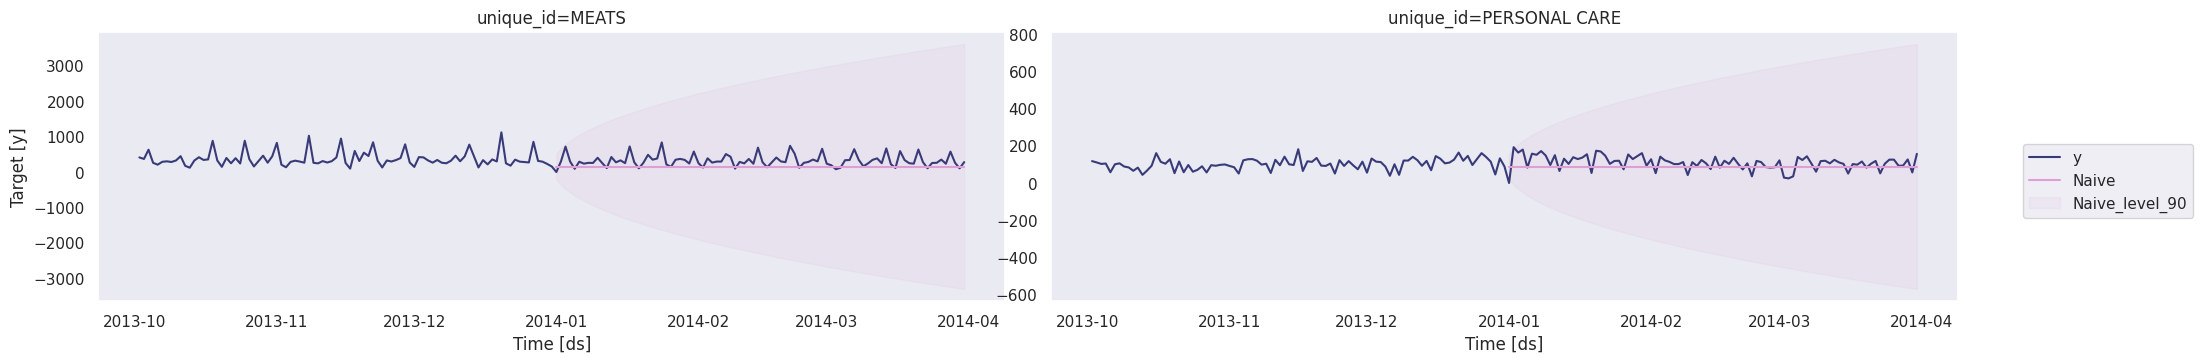

In [242]:
# Principio da Navalha de Ockman
model = StatsForecast(models=[Naive()], freq='D',n_jobs= -1) # n_jobs: qnts nucleos do processador ele vai utilizar, -1 significa todos os disponiveis
model.fit(train)

forecast_df = model.predict(h=horizon, level=[90])
forecast_df = forecast_df.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape_naive = wmape(forecast_df['y'].values,forecast_df['Naive'].values) # Naive é constante
print(f"WMAPE: {wmape_naive:.2%}")

model.plot(train, forecast_df, level=[90], unique_ids=['MEATS','PERSONAL CARE'], engine="matplotlib", max_insample_length=90)
# o modelo baseline ignorou um pouco a sazonalidade dos dados

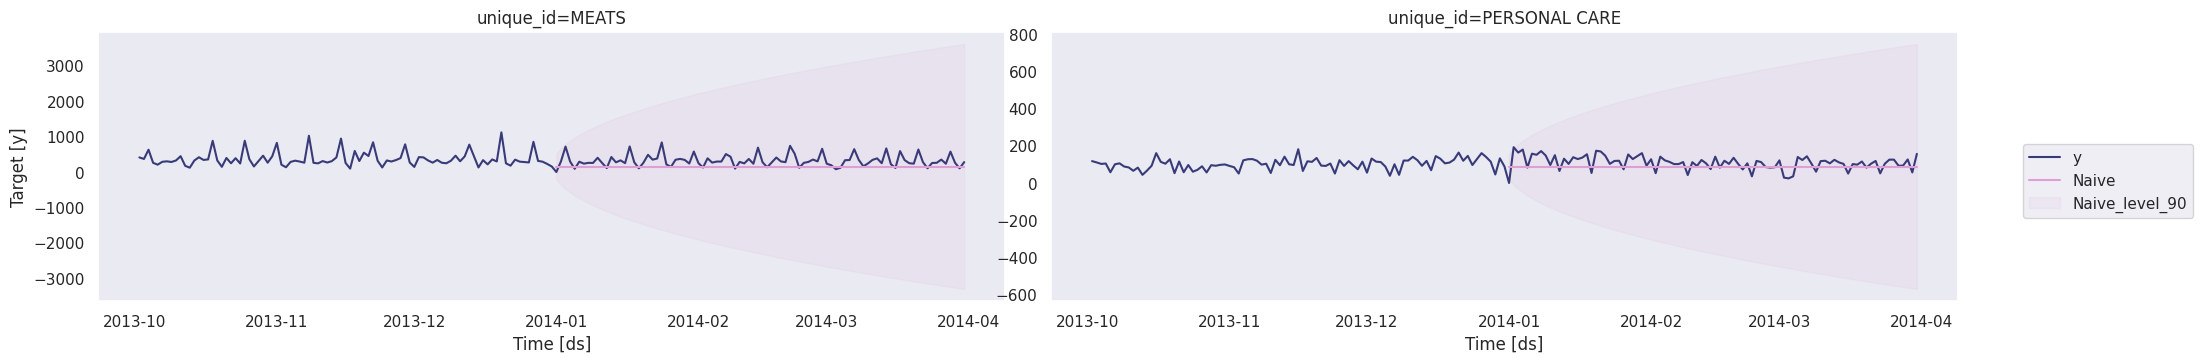

In [243]:
model.plot(train, forecast_df, level=[90], unique_ids=['MEATS','PERSONAL CARE'], max_insample_length=90)

In [255]:
model_season_naive = StatsForecast(models=[SeasonalNaive(season_length=7)], freq='D',n_jobs= -1) # n_jobs: qnts nucleos do processador ele vai utilizar, -1 significa todos os disponiveis
model_season_naive.fit(train)

forecast_dfs = model_season_naive.predict(h=horizon, level=[90])
forecast_dfs = forecast_dfs.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape_season_naive = wmape(forecast_dfs['y'].values,forecast_dfs['SeasonalNaive'].values) # Naive é constante
print(f"WMAPE: {wmape_season_naive:.2%}")

model_season_naive.plot(train, forecast_dfs, level=[90], unique_ids=['MEATS','PERSONAL CARE'], engine="plotly", max_insample_length=90)
# o modelo levou um pouco mais em consideração a sazonalidade dos dados

/home/jessimoura/.local/lib/python3.8/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 50.91%


In [261]:
intervals = ConformalIntervals(h=horizon, n_windows=2)

/home/jessimoura/.local/lib/python3.8/site-packages/statsforecast/core.py:485: FutureWarning:

In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.



WMAPE: 53.02%


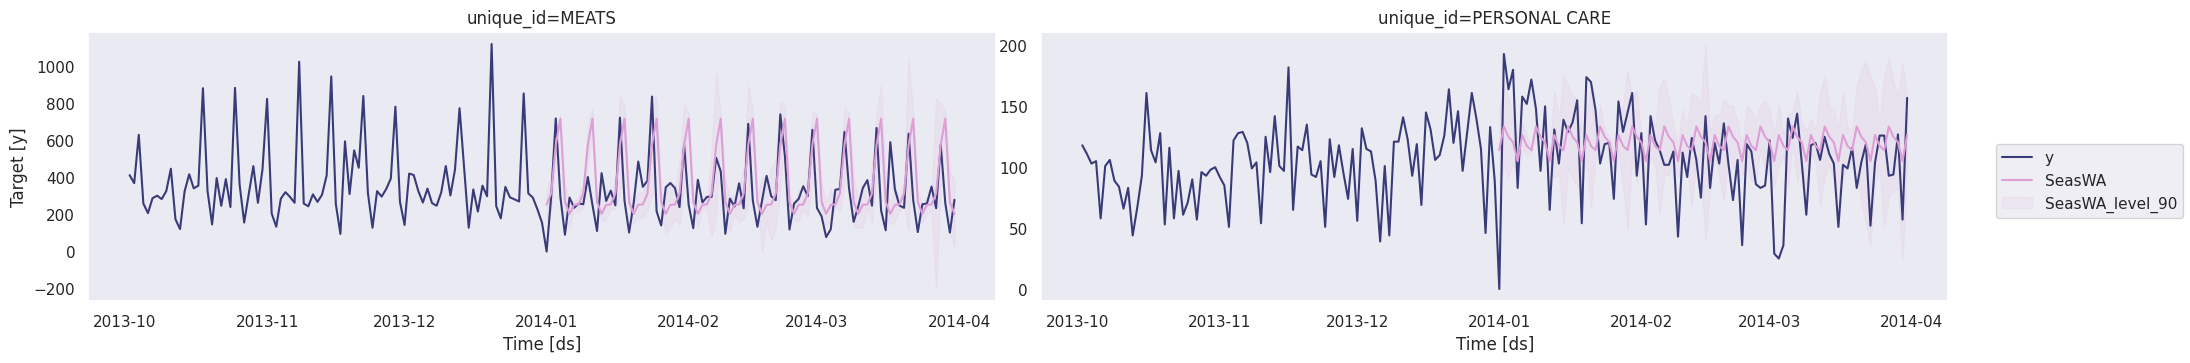

In [262]:
model_win_avg = StatsForecast(models=[SeasonalWindowAverage(season_length=7, window_size=2,prediction_intervals=intervals)], freq='D',n_jobs= -1) # n_jobs: qnts nucleos do processador ele vai utilizar, -1 significa todos os disponiveis
model_win_avg.fit(train)

forecast_df_wa = model_win_avg.predict(h=horizon, level=[90])
forecast_df_wa = forecast_df_wa.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape_win_avg = wmape(forecast_df_wa['y'].values,forecast_df_wa['SeasWA'].values) # Naive é constante
print(f"WMAPE: {wmape_win_avg:.2%}")

model_win_avg.plot(train, forecast_df_wa, level=[90], unique_ids=['MEATS','PERSONAL CARE'], engine="matplotlib", max_insample_length=90)
# o modelo baseline ignorou um pouco a sazonalidade dos dados

**ARIMA**

    - AR: olha para as vendas do passado e acha uma correlação futura
    - I: quantidade que a série foi diferenciada
    - MA: Média Móvel

In [264]:
model_arima = StatsForecast(models=[AutoARIMA(season_length=7)], freq='D',n_jobs= -1) # n_jobs: qnts nucleos do processador ele vai utilizar, -1 significa todos os disponiveis
model_arima.fit(train)

forecast_df_arima = model_arima.predict(h=horizon, level=[90])
forecast_df_arima = forecast_df_arima.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape_arima = wmape(forecast_df_arima['y'].values,forecast_df_arima['AutoARIMA'].values) # Naive é constante
print(f"WMAPE: {wmape_arima:.2%}")

model_arima.plot(train, forecast_df_arima, level=[90], unique_ids=['MEATS','PERSONAL CARE'], engine="plotly", max_insample_length=90)
# o modelo levou um pouco mais em consideração a sazonalidade dos dados

/home/jessimoura/.local/lib/python3.8/site-packages/statsforecast/core.py:485: FutureWarning:

In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.



WMAPE: 51.24%


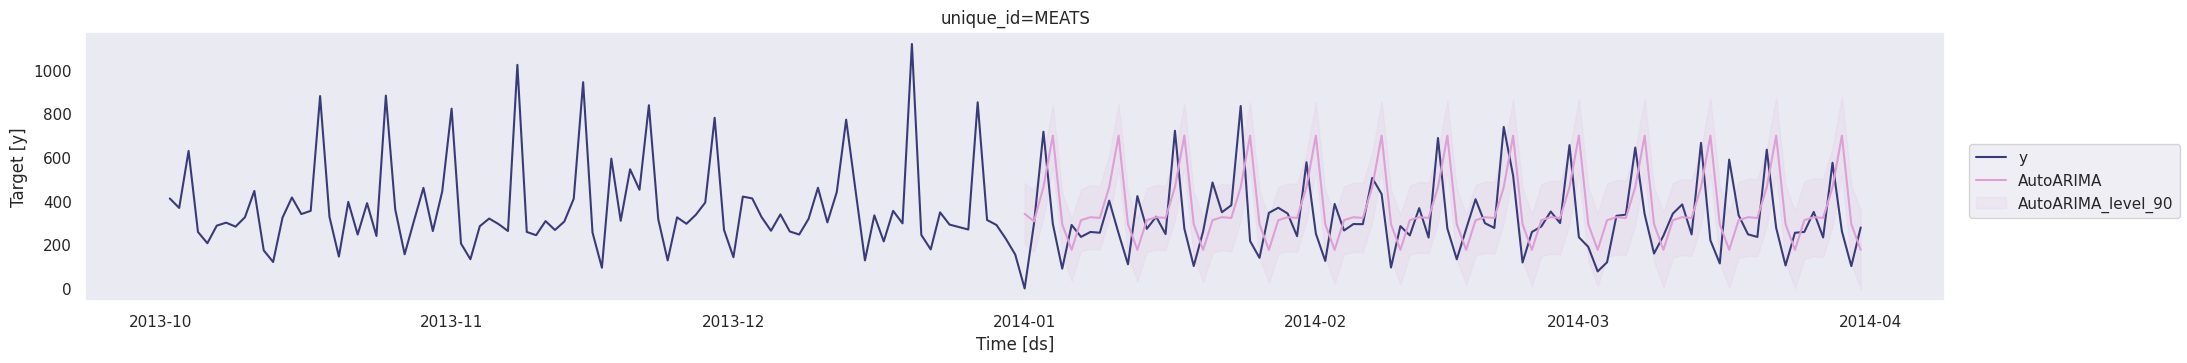

In [266]:
model_arima.plot(train, forecast_df_arima, level=[90], unique_ids=['MEATS'], engine="matplotlib", max_insample_length=90)

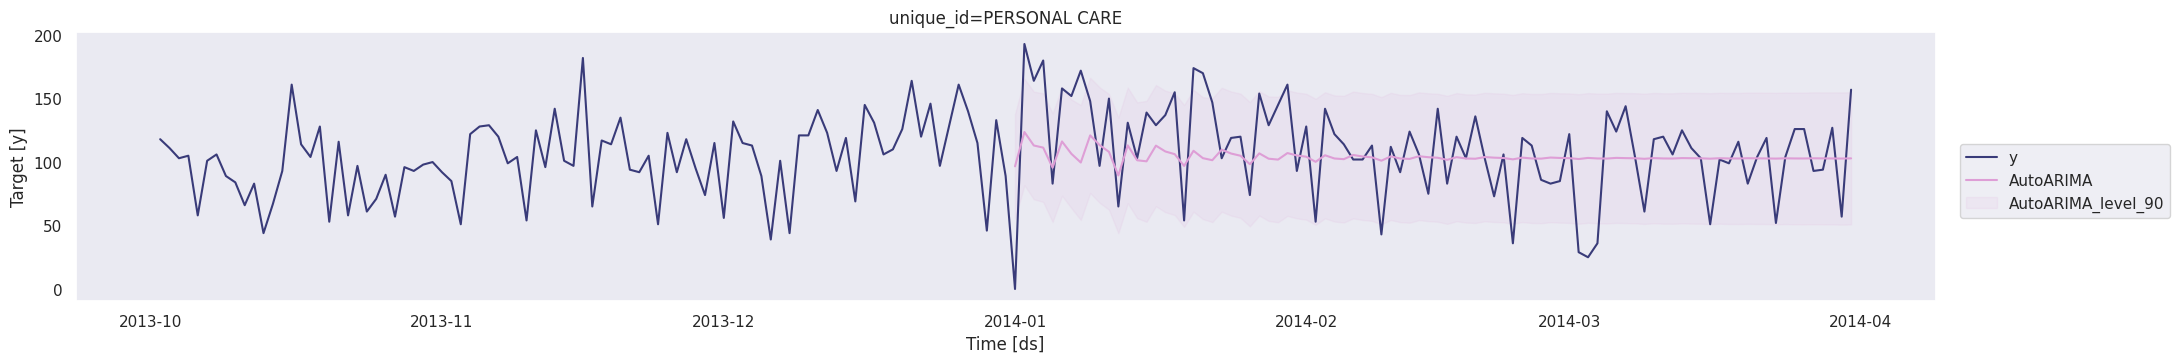

In [267]:
model_arima.plot(train, forecast_df_arima, level=[90], unique_ids=['PERSONAL CARE'], engine="matplotlib", max_insample_length=90)

**Multiple Models**

In [ ]:
models = StatsForecast(models=[Naive(),AutoARIMA(season_length=7), SeasonalNaive()], freq='D',n_jobs= -1) # n_jobs: qnts nucleos do processador ele vai utilizar, -1 significa todos os disponiveis
model_arima.fit(train)

forecast_df_arima = model_arima.predict(h=horizon, level=[90])
forecast_df_arima = forecast_df_arima.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape_arima = wmape(forecast_df_arima['y'].values,forecast_df_arima['AutoARIMA'].values) # Naive é constante
print(f"WMAPE: {wmape_arima:.2%}")

model_arima.plot(train, forecast_df_arima, level=[90], unique_ids=['MEATS','PERSONAL CARE'], engine="plotly", max_insample_length=90)